<a href="https://colab.research.google.com/github/18520381/434_Project_10/blob/main/VGG16%20Project/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
from torchvision import models
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Project_CE434/DogCat/source

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Project_CE434/DogCat/source


In [ ]:
import torch
import torch.nn as NeuralNet
import torch.nn.functional as NN_Func



class MyNet(NeuralNet.Module):
    def __init__(self):
        super(MyNet, self).__init__()
        self.base_model = models.vgg16(pretrained=True)
        
        for param in self.base_model.parameters():
            param.requires_grad = False
        
        self.fc3 = NeuralNet.Linear(4096, 128)
        self.fc4 = NeuralNet.Linear(128, 62)
        self.fc5 = NeuralNet.Linear(62, 3)        
        self.fc3.data = torch.randn(m.weight.size())
        self.base_model.fc = self.fc3

    def forward(self, x):
        x = self.base_model(x)
        x =NN_Func.relu(x)

        x = self.fc4(x)
        x =NN_Func.relu(x)
        x = self.fc5(x)
        x =NN_Func.relu(x)
        x = NN_Func.softmax(x)
        return x

In [ ]:
import torch
import os
import cv2
from tqdm import tqdm
import numpy as np
import torch.optim as optim
from model import MyNet
import matplotlib.pyplot as plt
from torchvision.transforms import ToTensor, ToPILImage

In [ ]:
CLASS_NAME = ["cat", "dog", "panda"]
DATA_PATH = "../data/animals/"
TARGET_SIZE = (224,224)

# **Load data**

In [ ]:
images, labels = [], []
pbar = tqdm(total=3000)
for class_name in CLASS_NAME:
    for _, _, files in os.walk(DATA_PATH+class_name, topdown=False):
        for name in files:
            image = cv2.imread(DATA_PATH+""+class_name+"/"+name)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224,224))
            images.append(image)
            if class_name == 'cat':
                labels.append(0)
            elif class_name== 'dog':
                labels.append(1)
            else:
                labels.append(2)
            pbar.update(1)
pbar.close()

100%|██████████| 3000/3000 [00:25<00:00, 117.65it/s]


In [ ]:
def loss_graph(losses:list):
    plt.plot( [i for i in range(len(losses))],losses)
    plt.ylabel('loss_value')
    plt.xlabel('step')
    plt.show()
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [ ]:
def to_tensor(images:list, labels:list):
    X_train = []
    Y_train = []
    x_batch = []
    y_batch = []

    for i in range(750):
        # plt.imshow(np.transpose(np.transpose(np.array(images[i]),(2,0,1)),(1,2,0)))
        # plt.show()
        # break
        # print(np.transpose(np.array(images[i]),(2,0,1)))
        # break

        x_batch.append(np.transpose(np.array(images[i]),(2,0,1)))
        x_batch.append(np.transpose(np.array(images[i+750]),(2,0,1)))
        
        x_batch.append(np.transpose(np.array(images[i+1500]),(2,0,1)))
        x_batch.append(np.transpose(np.array(images[i+2250]),(2,0,1)))
        
        y_batch.append(labels[i])
        y_batch.append(labels[i+750])
        y_batch.append(labels[i+1500])
        y_batch.append(labels[i+2250])

    # for count, img in enumerate(images):
    #     img = np.array(img)
    #     img = np.transpose(np.array(img),(2,0,1))  
    #     x_batch.append(img)
    #     if labels[count]==0:
    #         y_batch.append(0)
    #     elif labels[count]==1:
    #         y_batch.append(1)
    #     else:
    #         y_batch.append(2)

        X_train.append(torch.from_numpy(np.array(x_batch, dtype=np.int64)).float())
        Y_train.append(torch.from_numpy(np.array(y_batch)).long())
        x_batch = []
        y_batch = []

    return X_train, Y_train

In [ ]:
X_train, Y_train = to_tensor(images, labels)
len(X_train)

750

In [ ]:
net = MyNet()
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.00006, momentum=0.9)

In [ ]:
loss_values = []
for epoch in range(1):  
    
    for i, data in enumerate(X_train, 0):
        input = X_train[i]
        label = Y_train[i]
        
        optimizer.zero_grad()
        output = net(input)
        loss = criterion(output, label)

        loss_values.append(loss)
        loss.backward()
        optimizer.step()


/content/drive/MyDrive/Project_CE434/DogCat/source/model.py:41: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = NN_Func.softmax(x)


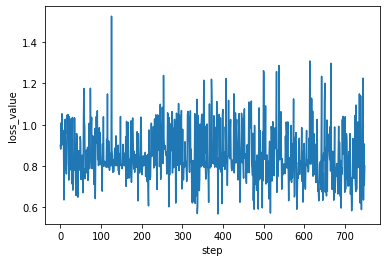

In [606]:
loss_graph(loss_values)

In [ ]:
X_test = X_train[400]
Y_test = Y_train[400]
out = net(X_test)
print(out)
print(Y_test)

tensor([[7.4528e-01, 2.5430e-01, 4.2709e-04],
        [5.8159e-01, 4.1732e-01, 1.0901e-03],
        [4.0966e-01, 5.8973e-01, 6.0595e-04],
        [4.1295e-02, 4.5628e-01, 5.0243e-01]], grad_fn=<SoftmaxBackward>)
tensor([0, 1, 1, 2])


/content/drive/MyDrive/Project_CE434/DogCat/source/model.py:41: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = NN_Func.softmax(x)


In [ ]:
for i,data in enumerate(out,0):
    print(torch.argmax(data)," - ",Y_test[i])
    print()

tensor(0)  -  tensor(0)

tensor(0)  -  tensor(1)

tensor(1)  -  tensor(1)

tensor(2)  -  tensor(2)



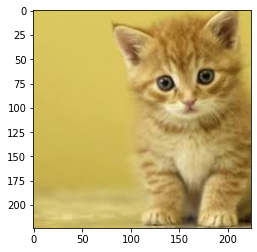

In [644]:
test_img = cv2.imread("/content/drive/MyDrive/Project_CE434/DogCat/source/cat3.jpg")
test_img = cv2.resize(test_img,(224,224))
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
plt.imshow(test_img)
plt.show()

In [645]:
test_img = np.array([np.transpose(test_img,(2,0,1))])
test_tensor = torch.from_numpy(test_img).float()
test_tensor.shape

torch.Size([1, 3, 224, 224])

In [646]:
out = net(test_tensor)
out

/content/drive/MyDrive/Project_CE434/DogCat/source/model.py:41: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = NN_Func.softmax(x)


tensor([[7.2725e-01, 2.7254e-01, 2.0908e-04]], grad_fn=<SoftmaxBackward>)